In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 20,10
import numpy as np
import glob
from scipy import stats

In [2]:
cd CSVs

/Users/racheldilley/Documents/Metis/git_repos/mta-project-1/CSVs


#### Load Data

In [3]:
extension = 'txt'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
data = pd.concat([pd.read_csv(f) for f in all_filenames ])
data


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,00:00:00,REGULAR,7053483,2390505
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,04:00:00,REGULAR,7053511,2390508
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,08:00:00,REGULAR,7053534,2390536
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,12:00:00,REGULAR,7053618,2390596
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,16:00:00,REGULAR,7053841,2390655
...,...,...,...,...,...,...,...,...,...,...,...
206852,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/03/2019,05:00:00,REGULAR,5554,376
206853,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/03/2019,09:00:00,REGULAR,5554,376
206854,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/03/2019,13:00:00,REGULAR,5554,376
206855,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/03/2019,17:00:00,REGULAR,5554,376


#### Clean Data

remove spaces from column names

In [5]:
data.columns = data.columns.str.replace(' ', '')

add Date_Time column and turnstile column

In [6]:
data['Date_Time'] = pd.to_datetime(data['DATE'], cache=True) + pd.to_timedelta(data['TIME'])

Group by date and stations

In [7]:
grouped_day = data.groupby(['STATION','DATE'], as_index=False).agg({'ENTRIES': ['min', 'max'], 'EXITS': ['min', 'max']})
#grouped = data.groupby(['STATION','DATE']).agg({'ENTRIES': ['min', 'max'], 'EXITS': ['min', 'max']})
#grouped = grouped.set_index('STATION')
#grouped.head()

In [8]:
#grouped.columns = [ 'Station', 'Date', 'ENTRIES_MIN', 'ENTRIES_MAX', 'EXITS_MIN', 'EXITS_MAX']
grouped_day.columns = [ 'Station','Date', 'ENTRIES_MIN', 'ENTRIES_MAX', 'EXITS_MIN', 'EXITS_MAX']
#grouped.columns = ['ENTRIES_MIN', 'ENTRIES_MAX', 'EXITS_MIN', 'EXITS_MAX']
#grouped.dtypes

Add weekday column

In [9]:
grouped_day['Date'] = pd.to_datetime(grouped_day['Date'], cache=True)
grouped_day['Week_Day'] = grouped_day['Date'].dt.day_name()

Find total entries exits, and traffic

In [10]:
grouped_day['Total_Entries'] = grouped_day['ENTRIES_MAX'] - grouped_day['ENTRIES_MIN']
grouped_day['Total_Exits'] = grouped_day['EXITS_MAX'] - grouped_day['EXITS_MIN']
grouped_day['Total_Traffic'] = grouped_day['Total_Exits'] + grouped_day['Total_Exits']
grouped_day.head()

,Station,Date,ENTRIES_MIN,ENTRIES_MAX,EXITS_MIN,EXITS_MAX,Week_Day,Total_Entries,Total_Exits,Total_Traffic
0,1 AV,2019-03-30,100798,955292159,12708,998669812,Saturday,955191361,998657104,1997314208
1,1 AV,2019-03-31,104309,955294001,13062,998670921,Sunday,955189692,998657859,1997315718
2,1 AV,2019-04-01,106948,955296212,13366,998672726,Monday,955189264,998659360,1997318720
3,1 AV,2019-04-02,110569,955297253,13856,998674559,Tuesday,955186684,998660703,1997321406
4,1 AV,2019-04-03,114965,955297587,14325,998676287,Wednesday,955182622,998661962,1997323924


In [11]:
grouped_day.drop(['ENTRIES_MIN','ENTRIES_MAX','EXITS_MIN','EXITS_MAX', 'Total_Entries', 'Total_Exits', ], axis=1)

grouped_day = grouped_day[(np.abs(stats.zscore(grouped_day['Total_Traffic'])) < 3)] #filtering

In [12]:
grouped_time = data.groupby(['STATION','TIME'], as_index=False).agg({'ENTRIES': ['min', 'max'], 'EXITS': ['min', 'max']})
grouped_time.columns = ['Station', 'Time', 'ENTRIES_MIN', 'ENTRIES_MAX', 'EXITS_MIN', 'EXITS_MAX']


In [13]:
grouped_time['Total_Entries'] = grouped_time['ENTRIES_MAX'] - grouped_time['ENTRIES_MIN']
grouped_time['Total_Exits'] = grouped_time['EXITS_MAX'] - grouped_time['EXITS_MIN']
grouped_time['Total_Traffic'] = grouped_time['Total_Exits'] + grouped_time['Total_Exits']
grouped_time.head()

,Station,Time,ENTRIES_MIN,ENTRIES_MAX,EXITS_MIN,EXITS_MAX,Total_Entries,Total_Exits,Total_Traffic
0,1 AV,00:00:00,100798,955451362,12708,998779409,955350564,998766701,1997533402
1,1 AV,04:00:00,101143,955451475,12724,998779435,955350332,998766711,1997533422
2,1 AV,07:41:30,123152,955301590,15360,998678517,955178438,998663157,1997326314
3,1 AV,07:54:19,2442404,370652473,535881,387768467,368210069,387232586,774465172
4,1 AV,07:54:45,2451533,370663467,536971,387783795,368211934,387246824,774493648


In [14]:
grouped_time.drop(['ENTRIES_MIN','ENTRIES_MAX','EXITS_MIN','EXITS_MAX', 'Total_Entries', 'Total_Exits', ], axis=1)

,Station,Time,Total_Traffic
0,1 AV,00:00:00,1997533402
1,1 AV,04:00:00,1997533422
2,1 AV,07:41:30,1997326314
3,1 AV,07:54:19,774465172
4,1 AV,07:54:45,774493648
...,...,...,...
99249,ZEREGA AV,05:00:00,826182
99250,ZEREGA AV,09:00:00,826254
99251,ZEREGA AV,13:00:00,826340
99252,ZEREGA AV,17:00:00,826496


In [15]:
grouped_time = grouped_time[(np.abs(stats.zscore(grouped_time['Total_Traffic'])) < 3)] #filtering

#### Combine data

### Finding top 10 visited stations

In [18]:
Total_ridership = grouped_day.groupby(['Station']).Total_Traffic.sum().reset_index()

In [19]:
Total_ridership.sort_values(by=['Total_Traffic'],inplace = True, ascending = False)


In [29]:
Row_list =[] 
indices = []
  
# Iterate over each row 
for index, rows in Total_ridership[:10].iterrows(): 
    # Create list for the current row 
#    my_list =[rows.STATION, rows.Total_Traffic] 
    my_list =rows.Total_Traffic 
    station_list = rows.Station
    # append the list to the final list 
    Row_list.append(my_list) 
    indices.append(station_list)
Total_ridership.head()


,Station,Total_Traffic
33,182-183 STS,284163869936
65,42 ST-PORT AUTH,281843135406
364,WORLD TRADE CTR,281680223666
172,CHAMBERS ST,277182762888
34,190 ST,276617755672


<BarContainer object of 10 artists>

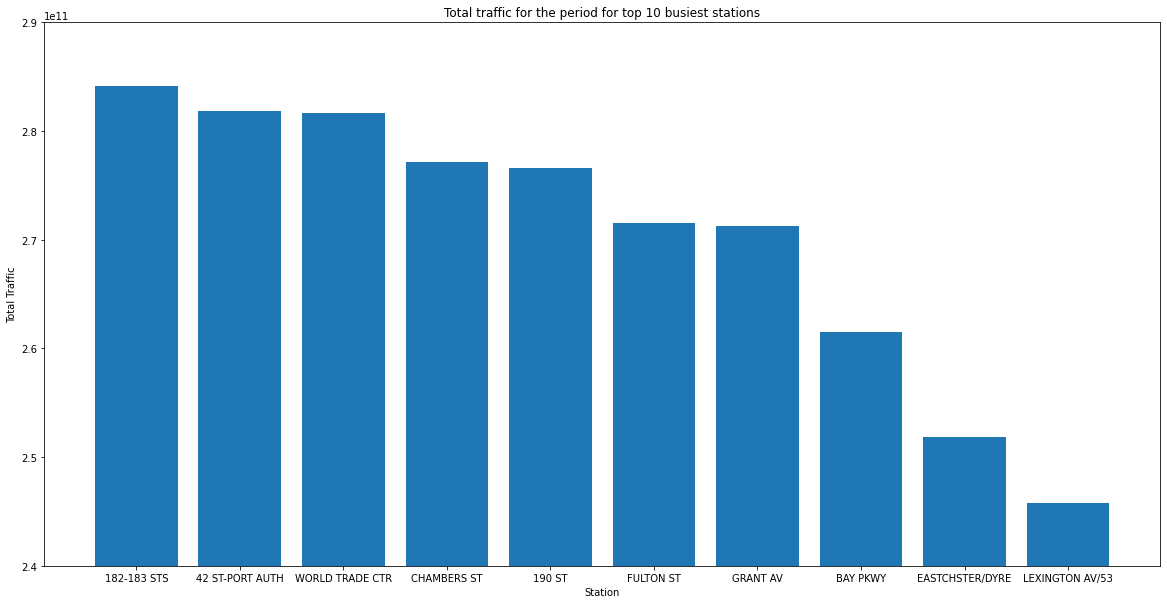

In [34]:
plt.ylim(240000000000,290000000000)
plt.xlabel("Station")
plt.ylabel("Total Traffic")
plt.title("Total traffic for the period for top 10 busiest stations")
plt.bar(indices, Row_list)

In [35]:
indices

['182-183 STS',
 '42 ST-PORT AUTH',
 'WORLD TRADE CTR',
 'CHAMBERS ST',
 '190 ST',
 'FULTON ST',
 'GRANT AV',
 'BAY PKWY',
 'EASTCHSTER/DYRE',
 'LEXINGTON AV/53']

### Find high traffic days

In [71]:
#Total_Weekly_ridership = grouped_day.groupby(['Week_Day']).Total_Traffic.sum().reset_index()
Total_Weekly_ridership = grouped_day.groupby(['Week_Day']).Total_Traffic.mean().reset_index()
Total_Weekly_ridership.sort_values(by=['Total_Traffic'],inplace = True, ascending = False)
Total_Weekly_ridership.head()

,Week_Day,Total_Traffic
0,Friday,4.039308e+08
6,Wednesday,4.030400e+08
4,Thursday,4.027653e+08
5,Tuesday,4.026115e+08
3,Sunday,4.018840e+08


<BarContainer object of 7 artists>

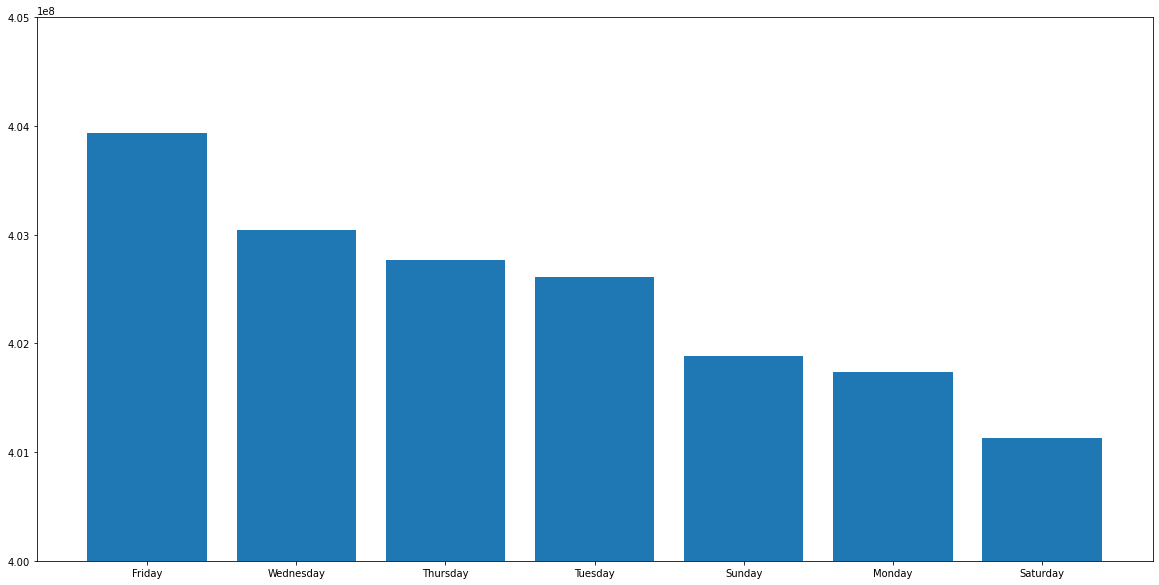

In [74]:
#plt.ylim(1610000000000,1620000000000)
plt.ylim(400000000,405000000)
plt.bar(Total_Weekly_ridership['Week_Day'], Total_Weekly_ridership['Total_Traffic'])

Lowest Trafic Days: Saturday, Monday, Sunday
Highest Traffic Days: Friday, Wedensday, Tuesday 

In [78]:
Top5 = Total_ridership['Station'][0:1].tolist()
#if "CANAL ST" in Top5:
 #   print("TRUE")
#plt.hist(Total_ridership['Total_Traffic'])
#station_grouped_filtered['STATION'].head()
Top5_stations = grouped_day[grouped_day['Station'].isin(Top5)]
#Top5_station_weekly = Top5_stations.groupby(['Station','Week_Day']).Total_Traffic.sum().reset_index()
Top5_station_weekly = Top5_stations.groupby(['Station','Week_Day']).Total_Traffic.mean().reset_index()

       Station   Week_Day  Total_Traffic
0  182-183 STS     Friday   3.690440e+09
1  182-183 STS     Monday   3.690440e+09
2  182-183 STS   Saturday   3.690440e+09
3  182-183 STS     Sunday   3.690440e+09
4  182-183 STS   Thursday   3.690440e+09
5  182-183 STS    Tuesday   3.690440e+09
6  182-183 STS  Wednesday   3.690440e+09


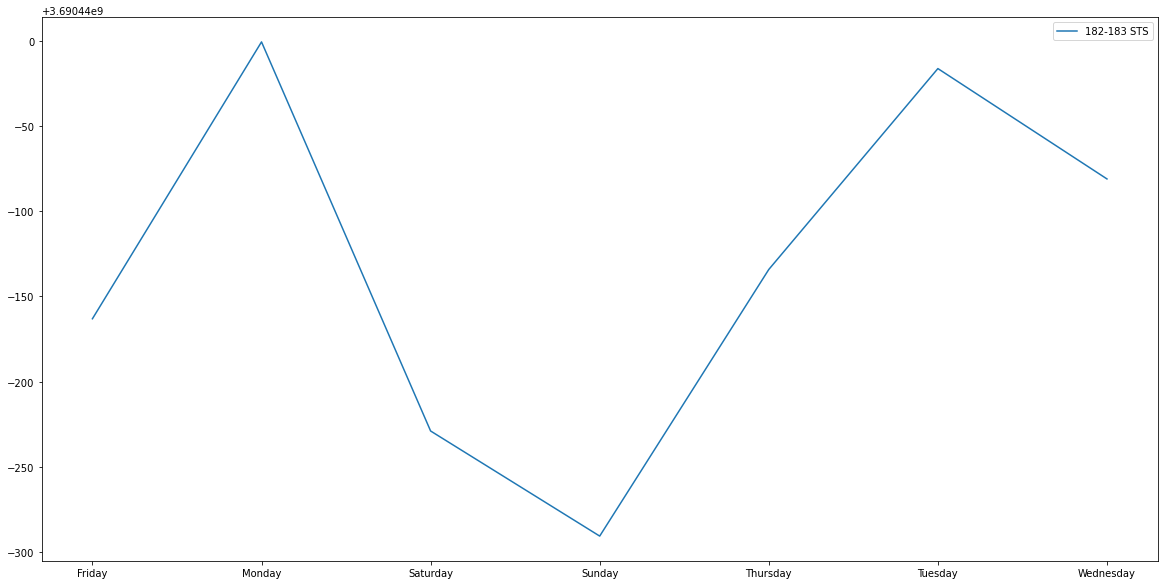

1   NaN
3   NaN
Name: Total_Traffic, dtype: float64


In [87]:

for stations in Top5:
    station = Top5_station_weekly[Top5_station_weekly['Station'] == stations]
    print(station)
    plt.plot(station['Week_Day'],station['Total_Traffic'],label = stations)
#plt.ylim(32500000000,40700000000)
#plt.ylim(400000000,405000000)
plt.legend()
plt.show()

station_monday = station[station['Week_Day'] == 'Monday'] 
station_sunday = station[station['Week_Day'] == 'Sunday']
difference = station_monday['Total_Traffic'] - station_sunday['Total_Traffic']
print(difference)

In [66]:
Bottom5 = Total_ridership['Station'][-10:].tolist()
#if "CANAL ST" in Top5:
 #   print("TRUE")
#plt.hist(Total_ridership['Total_Traffic'])
#station_grouped_filtered['STATION'].head()
Bottom5_stations = grouped_day[grouped_day['Station'].isin(Bottom5)]
Bottom5_stations_weekly = Bottom5_stations.groupby(['Station','Week_Day']).Total_Traffic.sum().reset_index()

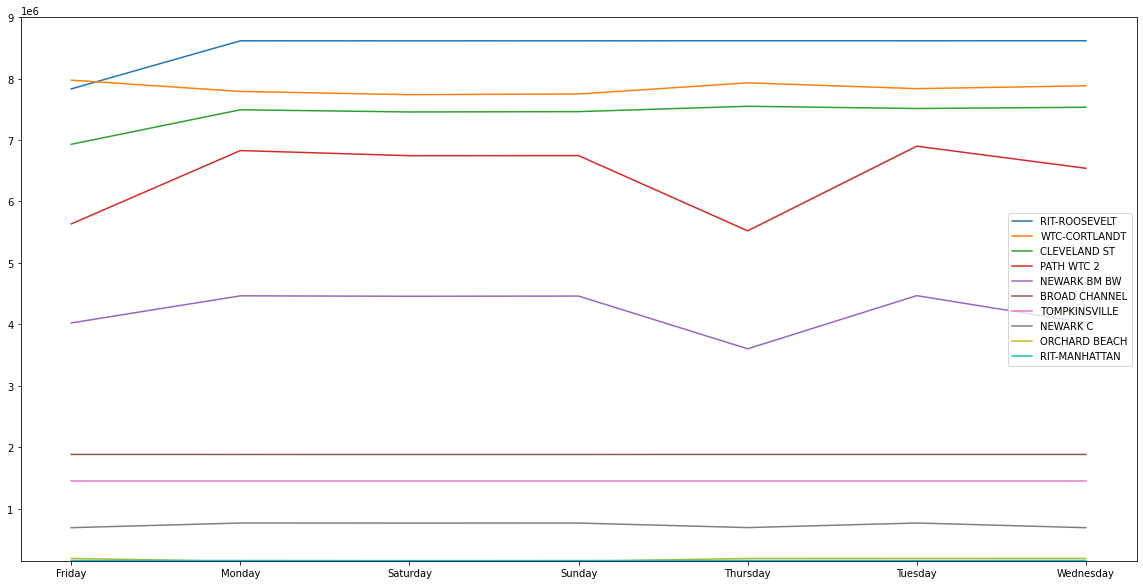

In [70]:
for stations in Bottom5:
    station = Bottom5_stations_weekly[Bottom5_stations_weekly['Station'] == stations]
    #print(station)
    plt.plot(station['Week_Day'],station['Total_Traffic'],label = stations)
plt.ylim(150000,9000000)
plt.legend()
plt.show()

### Find peak hours

### Find high traffic areas for games

### Find top stations in each area code

In [96]:
loc_data = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/Stations.csv')
print(loc_data.Borough.unique())
loc_data.tail()

['Q' 'M' 'Bk' 'Bx' 'SI']


,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,ADA,ADA Notes
491,517,517,S15,SIR,Staten Island,Prince's Bay,SI,SIR,Open Cut,40.525507,-74.200064,St George,Tottenville,0,NaN
492,518,518,S14,SIR,Staten Island,Pleasant Plains,SI,SIR,Embankment,40.522410,-74.217847,St George,Tottenville,0,NaN
493,519,519,S13,SIR,Staten Island,Richmond Valley,SI,SIR,Open Cut,40.519631,-74.229141,St George,Tottenville,0,NaN
494,522,522,S09,SIR,Staten Island,Tottenville,SI,SIR,At Grade,40.512764,-74.251961,St George,NaN,1,NaN
495,523,523,S11,SIR,Staten Island,Arthur Kill,SI,SIR,At Grade,40.516578,-74.242096,St George,Tottenville,1,NaN
